# Introduction

Our group member which consist of

1.   Wan Ahmad Lutfi bin Wan Azinuddin [U2101912]
2.   Nuraiman Danial bin Mohd Zaki [22004858]
3.   Wan Harith Azdy bin Wan Ismail [U2101138]
4.   Abdul Azim Bin Abdul Salam [U2102134]

We decided to create a weather prediction model for our group assignment. We chose this project to step out of our comfort zone and test our abilities to analyze, train, and execute the task.

Our main challenge at that time was finding a suitable dataset to begin our work. Initially, we compiled all the datasets we could find, and we ultimately decided on one from Kaggle.

[ https://www.kaggle.com/code/bhanupratapbiswas/weather-data-analysis ]

After that we start by doing task deviation so each of us can contribute and make sure our work is being done with each of our own specialization.

We try to always have a weekly meeting and communicate using our WhatsApp group. This not only allows us to get updates on our progress but also ensures our communication is streamlined, which immensely helps avoid miscommunication among team members.

This report details the analysis and prediction of weather conditions using historical weather data. The focus is on hypothesis testing for specific features and the training of predictive models.

## Library Installation and Imports

### Google Drive Mounting

In [1]:
from google.colab import drive
drive.mount('/content/drive')

### Dependencies Installation

In [2]:
!pip install flask-ngrok
!pip install pyngrok

### Library Importing

We import all necessary libraries that were being used for the dataset and also the training of the model

In [3]:
# Data Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy
import pickle
from scipy import stats

# Model Training Library
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)

# UI Library
from flask import Flask, render_template, request
from pyngrok import ngrok
import joblib

## Load Data

In [4]:
file_path = 'Weather Data.csv'

In [5]:
data = pd.read_csv(file_path)
print(data.head())

       Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2         88                6   
4  1/1/2012 4:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  
0            8.0     101.24                   Fog  
1            8.0     101.24                   Fog  
2            4.0     101.26  Freezing Drizzle,Fog  
3            4.0     101.27  Freezing Drizzle,Fog  
4            4.8     101.23                   Fog  


## Data Preprocessing

Data is cleaned and preprocessed, handling missing values, encoding categorical variables, and ensuring the dataset is ready for analysis and modeling.

In [6]:
print(data.shape)

for column in data.columns:
    print('->', column, '(', data[column].dtypes, ')', data[column].isna().sum())

(8784, 8)
-> Date/Time ( object ) 0
-> Temp_C ( float64 ) 0
-> Dew Point Temp_C ( float64 ) 0
-> Rel Hum_% ( int64 ) 0
-> Wind Speed_km/h ( int64 ) 0
-> Visibility_km ( float64 ) 0
-> Press_kPa ( float64 ) 0
-> Weather ( object ) 0


Changing the date and time to date and time format

In [7]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'])
data.ffill()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date/Time         8784 non-null   datetime64[ns]
 1   Temp_C            8784 non-null   float64       
 2   Dew Point Temp_C  8784 non-null   float64       
 3   Rel Hum_%         8784 non-null   int64         
 4   Wind Speed_km/h   8784 non-null   int64         
 5   Visibility_km     8784 non-null   float64       
 6   Press_kPa         8784 non-null   float64       
 7   Weather           8784 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 549.1+ KB


In [9]:
data.describe()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,2012-07-01 23:30:00,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
min,2012-01-01 00:00:00,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,2012-04-01 11:45:00,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,2012-07-01 23:30:00,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,2012-10-01 11:15:00,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,2012-12-31 23:00:00,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000
std,NaN,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005


We want to check the value for the output that we want to predict, which is the weather

In [10]:
#check for the number of of unique values for weather
print(data['Weather'].nunique())
print(data['Weather'].unique())

50
['Fog' 'Freezing Drizzle,Fog' 'Mostly Cloudy' 'Cloudy' 'Rain'
 'Rain Showers' 'Mainly Clear' 'Snow Showers' 'Snow' 'Clear'
 'Freezing Rain,Fog' 'Freezing Rain' 'Freezing Drizzle' 'Rain,Snow'
 'Moderate Snow' 'Freezing Drizzle,Snow' 'Freezing Rain,Snow Grains'
 'Snow,Blowing Snow' 'Freezing Fog' 'Haze' 'Rain,Fog' 'Drizzle,Fog'
 'Drizzle' 'Freezing Drizzle,Haze' 'Freezing Rain,Haze' 'Snow,Haze'
 'Snow,Fog' 'Snow,Ice Pellets' 'Rain,Haze' 'Thunderstorms,Rain'
 'Thunderstorms,Rain Showers' 'Thunderstorms,Heavy Rain Showers'
 'Thunderstorms,Rain Showers,Fog' 'Thunderstorms' 'Thunderstorms,Rain,Fog'
 'Thunderstorms,Moderate Rain Showers,Fog' 'Rain Showers,Fog'
 'Rain Showers,Snow Showers' 'Snow Pellets' 'Rain,Snow,Fog'
 'Moderate Rain,Fog' 'Freezing Rain,Ice Pellets,Fog'
 'Drizzle,Ice Pellets,Fog' 'Drizzle,Snow' 'Rain,Ice Pellets'
 'Drizzle,Snow,Fog' 'Rain,Snow Grains' 'Rain,Snow,Ice Pellets'
 'Snow Showers,Fog' 'Moderate Snow,Blowing Snow']


In [11]:
data['Weather'].value_counts()

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

In [12]:
data.nunique()

Date/Time           8784
Temp_C               533
Dew Point Temp_C     489
Rel Hum_%             83
Wind Speed_km/h       34
Visibility_km         24
Press_kPa            518
Weather               50
dtype: int64

With the data information obtained, we can start working on some exploration of the data to further manipulate and plan how would the model work.

Since the data just need some minor changes and manipulation, we are able to start the EDA without too much of a problem.

## EDA

In [13]:
features = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']
target = 'Weather'

X = data[features]
y = data[target]

print(X.nunique())
print(y.head(-5))

Temp_C              533
Dew Point Temp_C    489
Rel Hum_%            83
Wind Speed_km/h      34
Visibility_km        24
Press_kPa           518
dtype: int64
0                        Fog
1                        Fog
2       Freezing Drizzle,Fog
3       Freezing Drizzle,Fog
4                        Fog
                ...         
8774                    Snow
8775                    Snow
8776                    Snow
8777                    Snow
8778                    Snow
Name: Weather, Length: 8779, dtype: object


### Distribution Histogram of Features

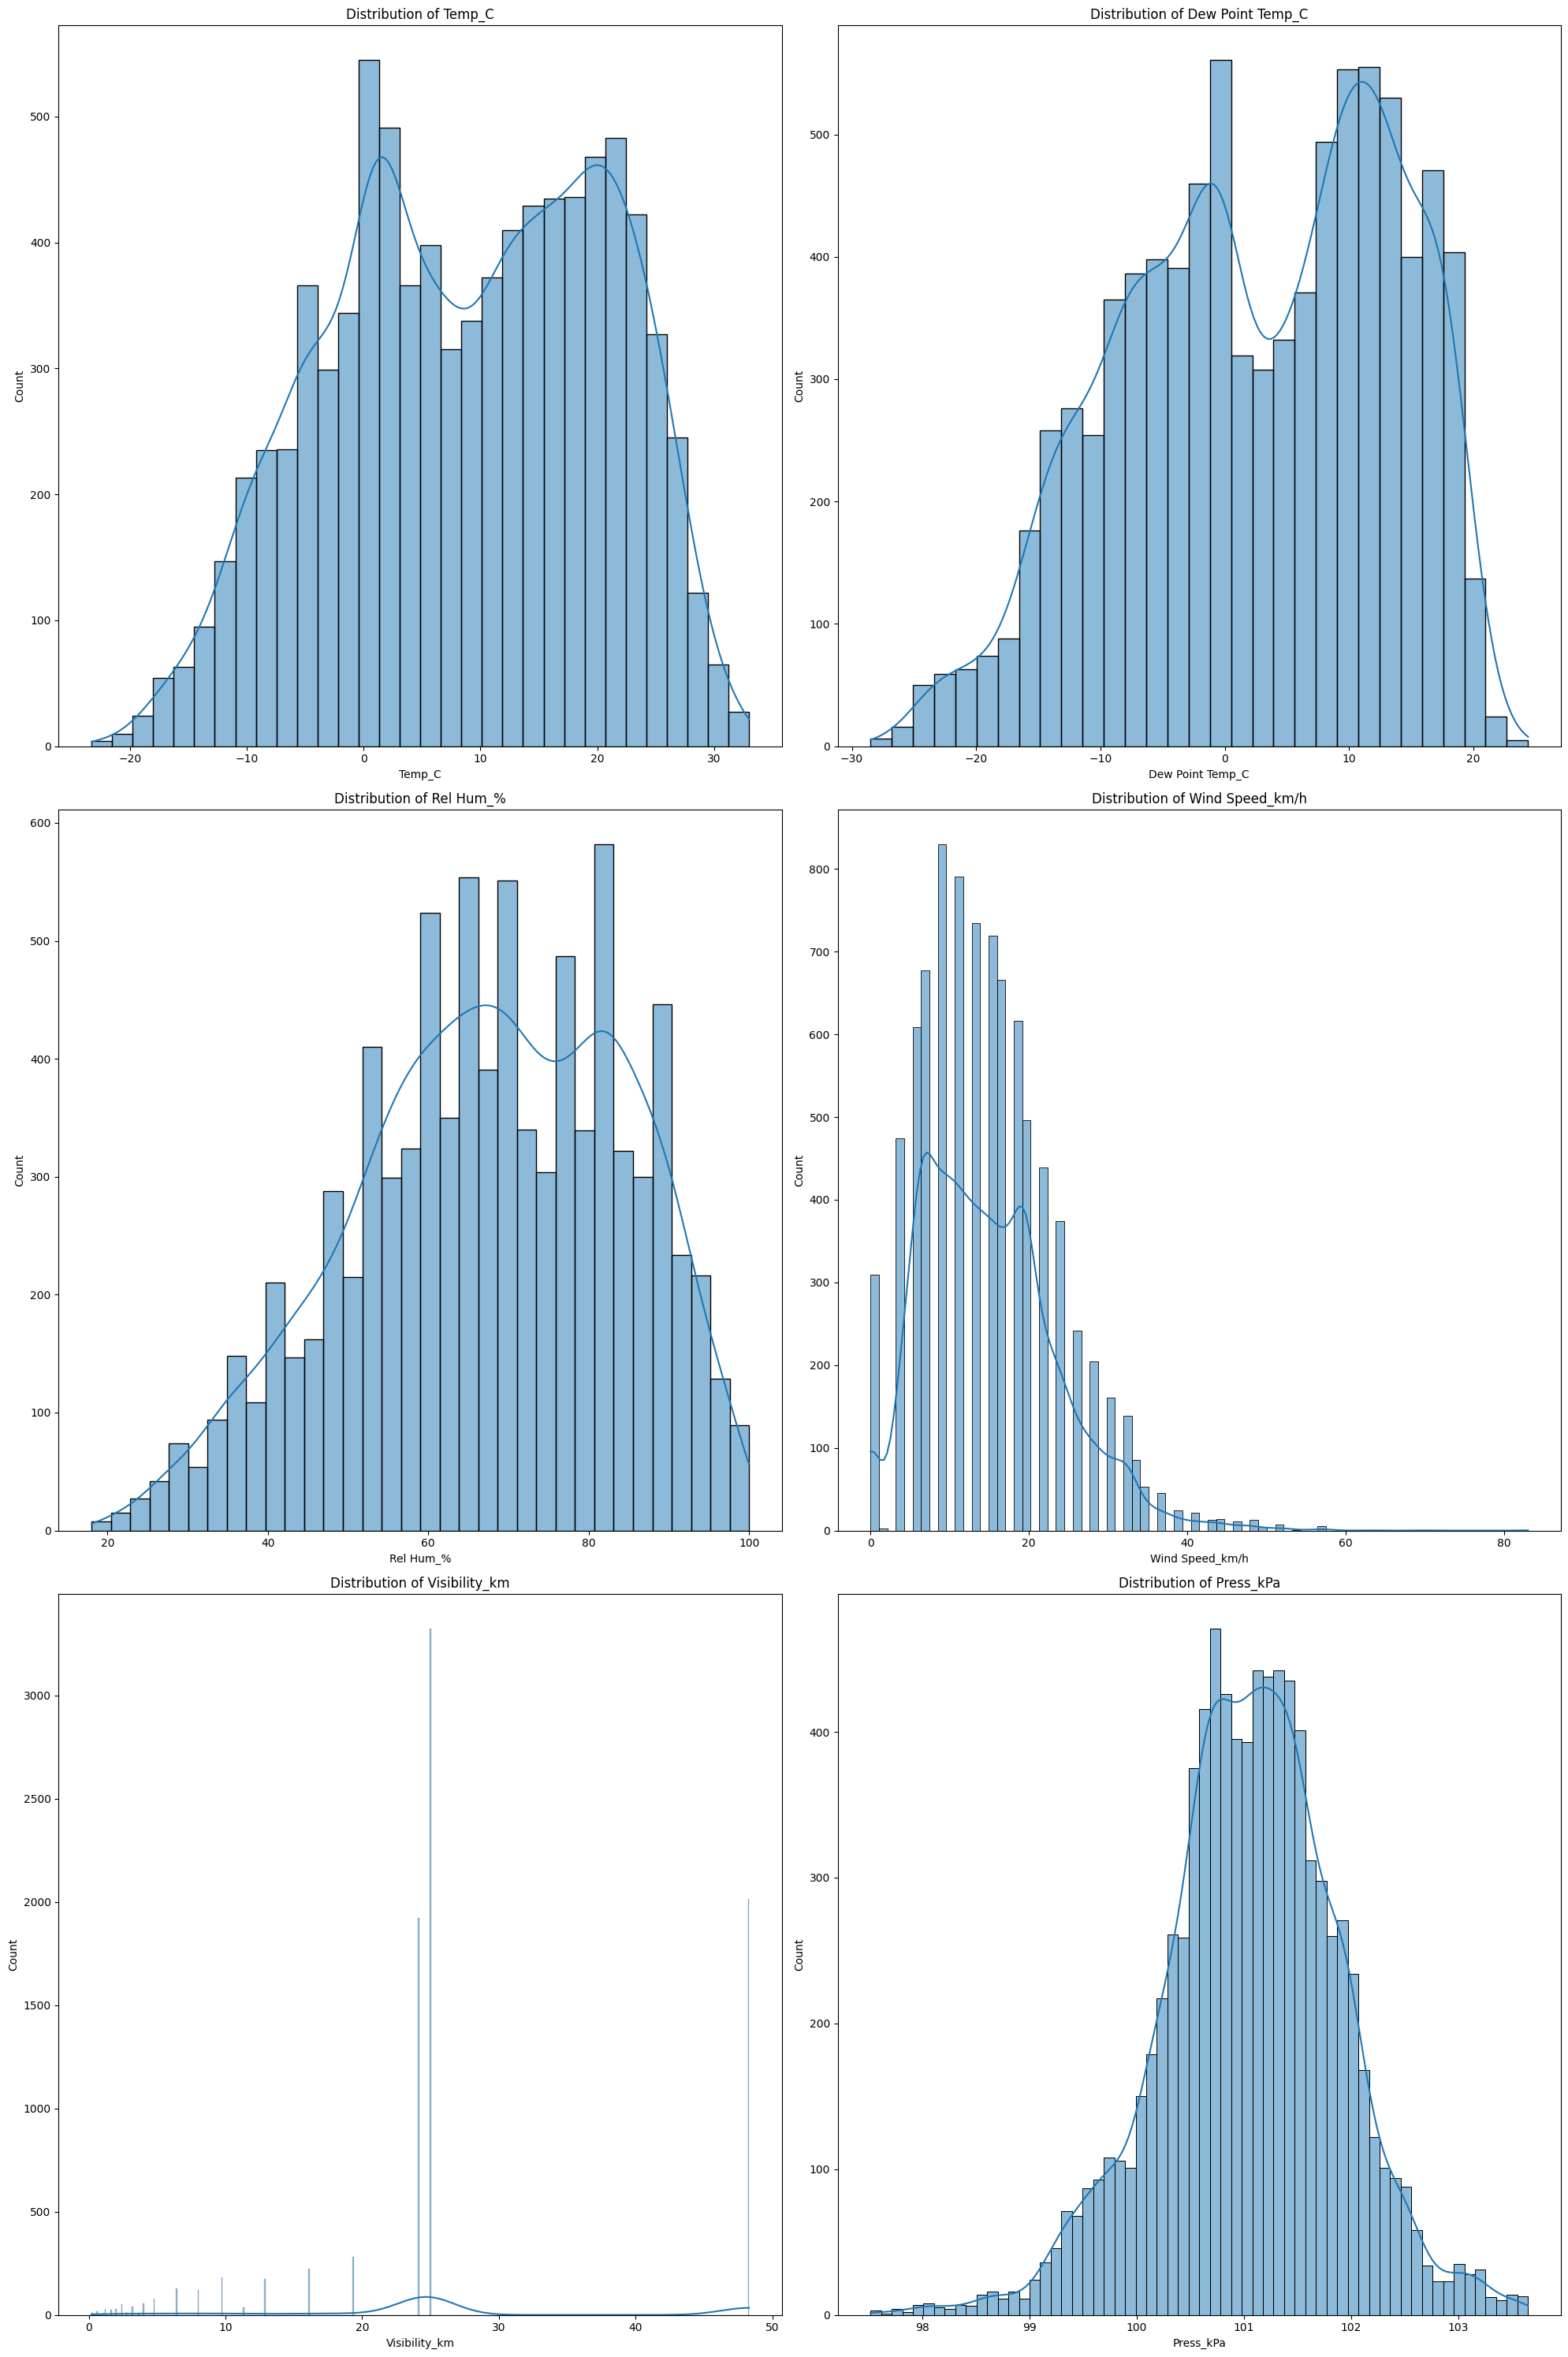

In [14]:
plt.figure(figsize=(20, 30))

for i, column in enumerate(X.columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

Histograms allow us to identify key features in the data, which include:

Distribution Shape:

1. Central Tendency: The peak of the histogram shows where most of the data points are concentrated. This indicates the central tendency of the data. For example, in the "Temp_C" histogram, the highest bars around 10-20°C show that these temperatures are the most common.
Spread/Dispersion:

2. Range of the Data: The width of the histogram provides insight into the range and spread of the data. The spread shows how data points are distributed across different values. For instance, the "Wind Speed, km/h" histogram shows a wide range from 0 to about 60 km/h, indicating varying wind speeds.
Frequency of Data:

3. Density and Frequency: Histograms show how frequently each range of values occurs within the dataset. Higher bars indicate a higher frequency of data points within that range. For example, the "Press, kPa" histogram shows a high frequency around 100-101 kPa, indicating that these pressure values are very common.

We are able to pinpoint noteable value from the histogram and it allow us to further brainstorm on how we want to approach the model.

### Relationship Boxplot of Features vs Weather

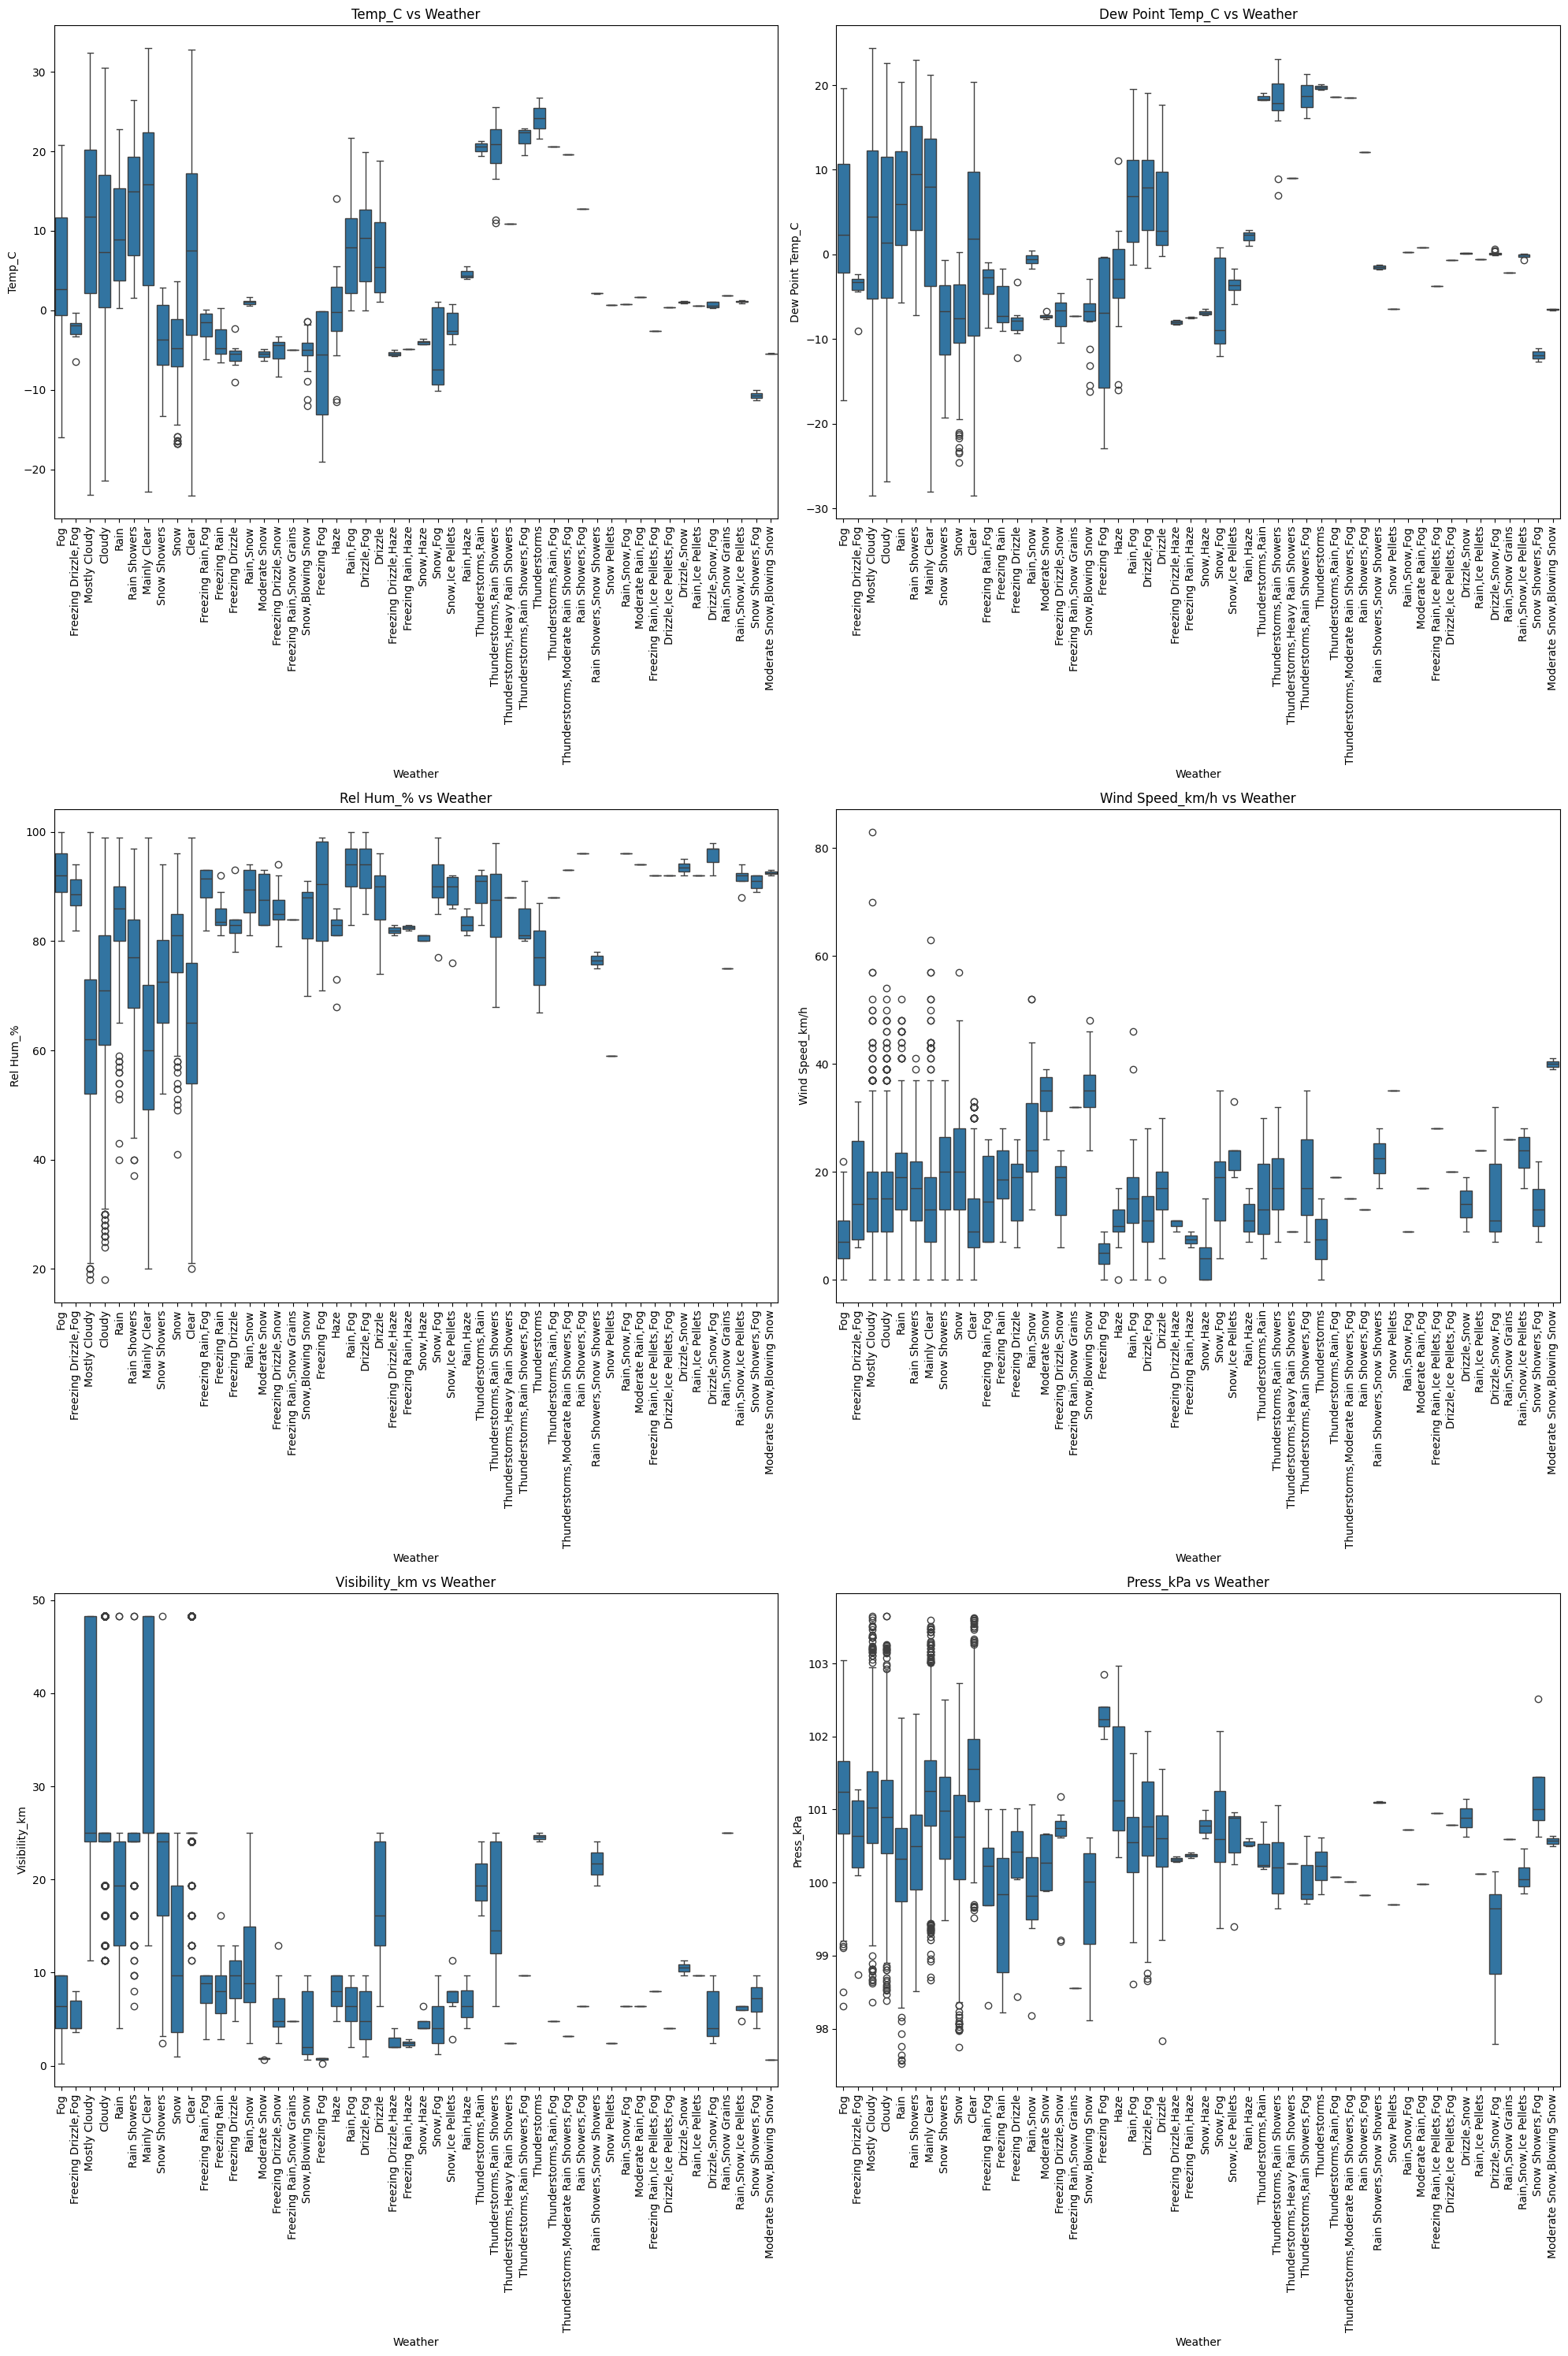

In [15]:
data_exploded = (data.explode('Weather')).reset_index(drop=True)

plt.figure(figsize=(20, 30))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='Weather', y=feature, data=data_exploded)
    plt.xticks(rotation=90)
    plt.title(f'{feature} vs Weather')

plt.tight_layout()
plt.show()

Boxplots allow us to identify key features in the data, which include:

1. Central Tendency: We can see the median of each feature against the weather, indicated by the line inside the box. This helps us understand the typical or middle value of the data for each weather condition.

2. Range of the Data: The whiskers extend from the smallest to the largest values within 1.5 times the interquartile range (IQR) from the lower and upper quartiles. Being able to see the range of each feature against the weather allows us to plan our next steps by understanding the variability and spread of the data.

3. Outliers: Outliers are data points that fall outside the whiskers and are plotted as individual points. We can see the outliers for each feature, which helps us identify unusual or rare occurrences that may need further investigation or could indicate important exceptions in the data.

These features together provide a comprehensive view of the data's distribution across different weather conditions, facilitating better analysis and decision-making.

### Correlation Matrix of Features

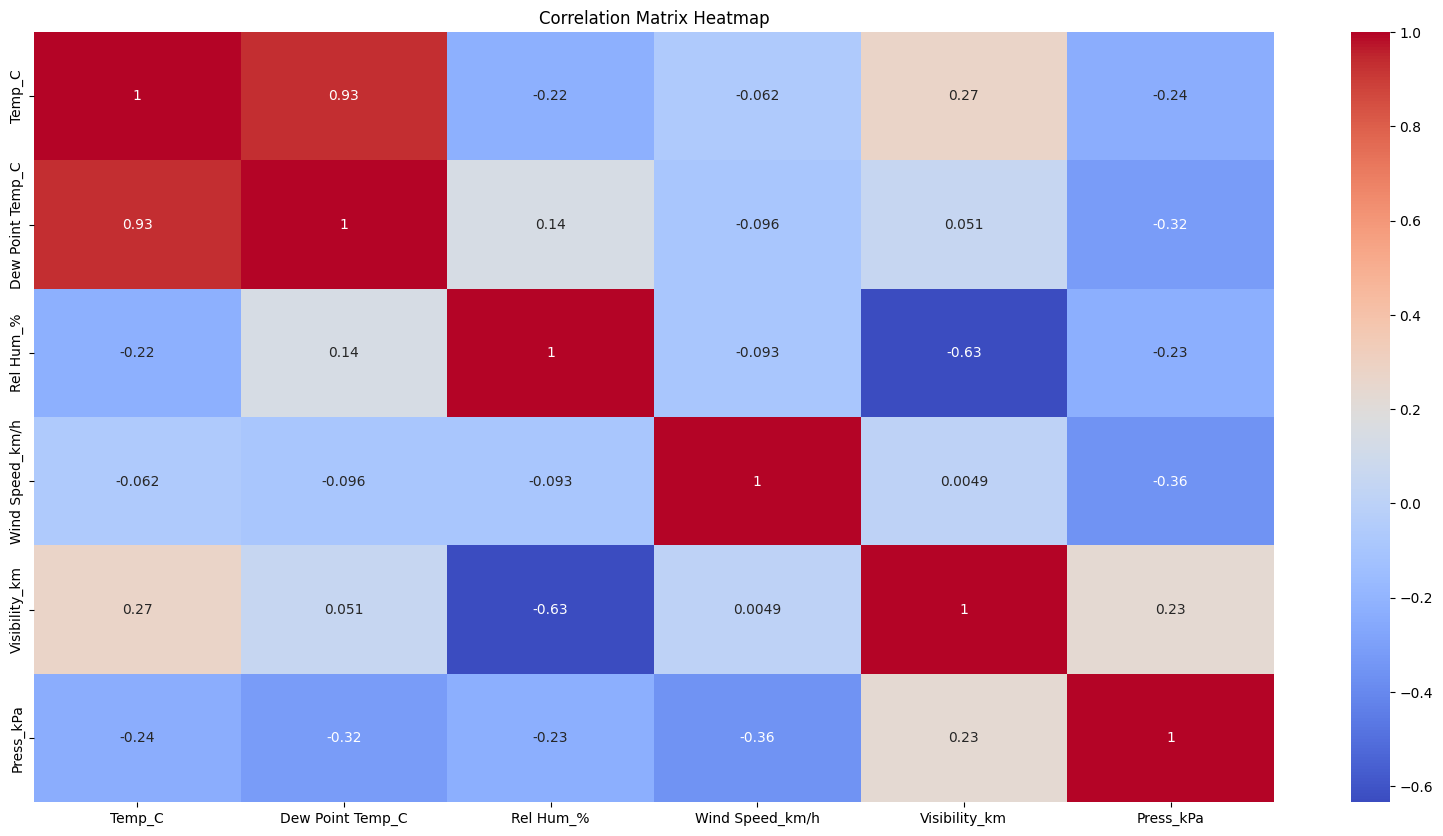

In [16]:
corr_matrix = data[features].corr()

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

The correlation matrix provides a statistical summary of the linear relationships between different features in the dataset. Each cell in the matrix represents the correlation coefficient between two features. The correlation coefficient ranges from -1 to 1, where:

- 1 indicates a perfect positive linear relationship.
- -1 indicates a perfect negative linear relationship.
- 0 indicates no linear relationship.

#### Key Observations:
1. **Temperature and Dew Point Temperature**: These two features typically have a strong positive correlation because both measure aspects of atmospheric moisture. A high dew point usually means a higher temperature.
2. **Temperature and Relative Humidity**: Generally, temperature is inversely related to relative humidity. As temperature increases, the air can hold more moisture, which often results in lower relative humidity levels.
3. **Wind Speed and Pressure**: These features might show some correlation, as changes in atmospheric pressure can drive wind patterns. High pressure often leads to lower wind speeds and vice versa.

### Data Scatterplot

<Figure size 1500x1500 with 0 Axes>

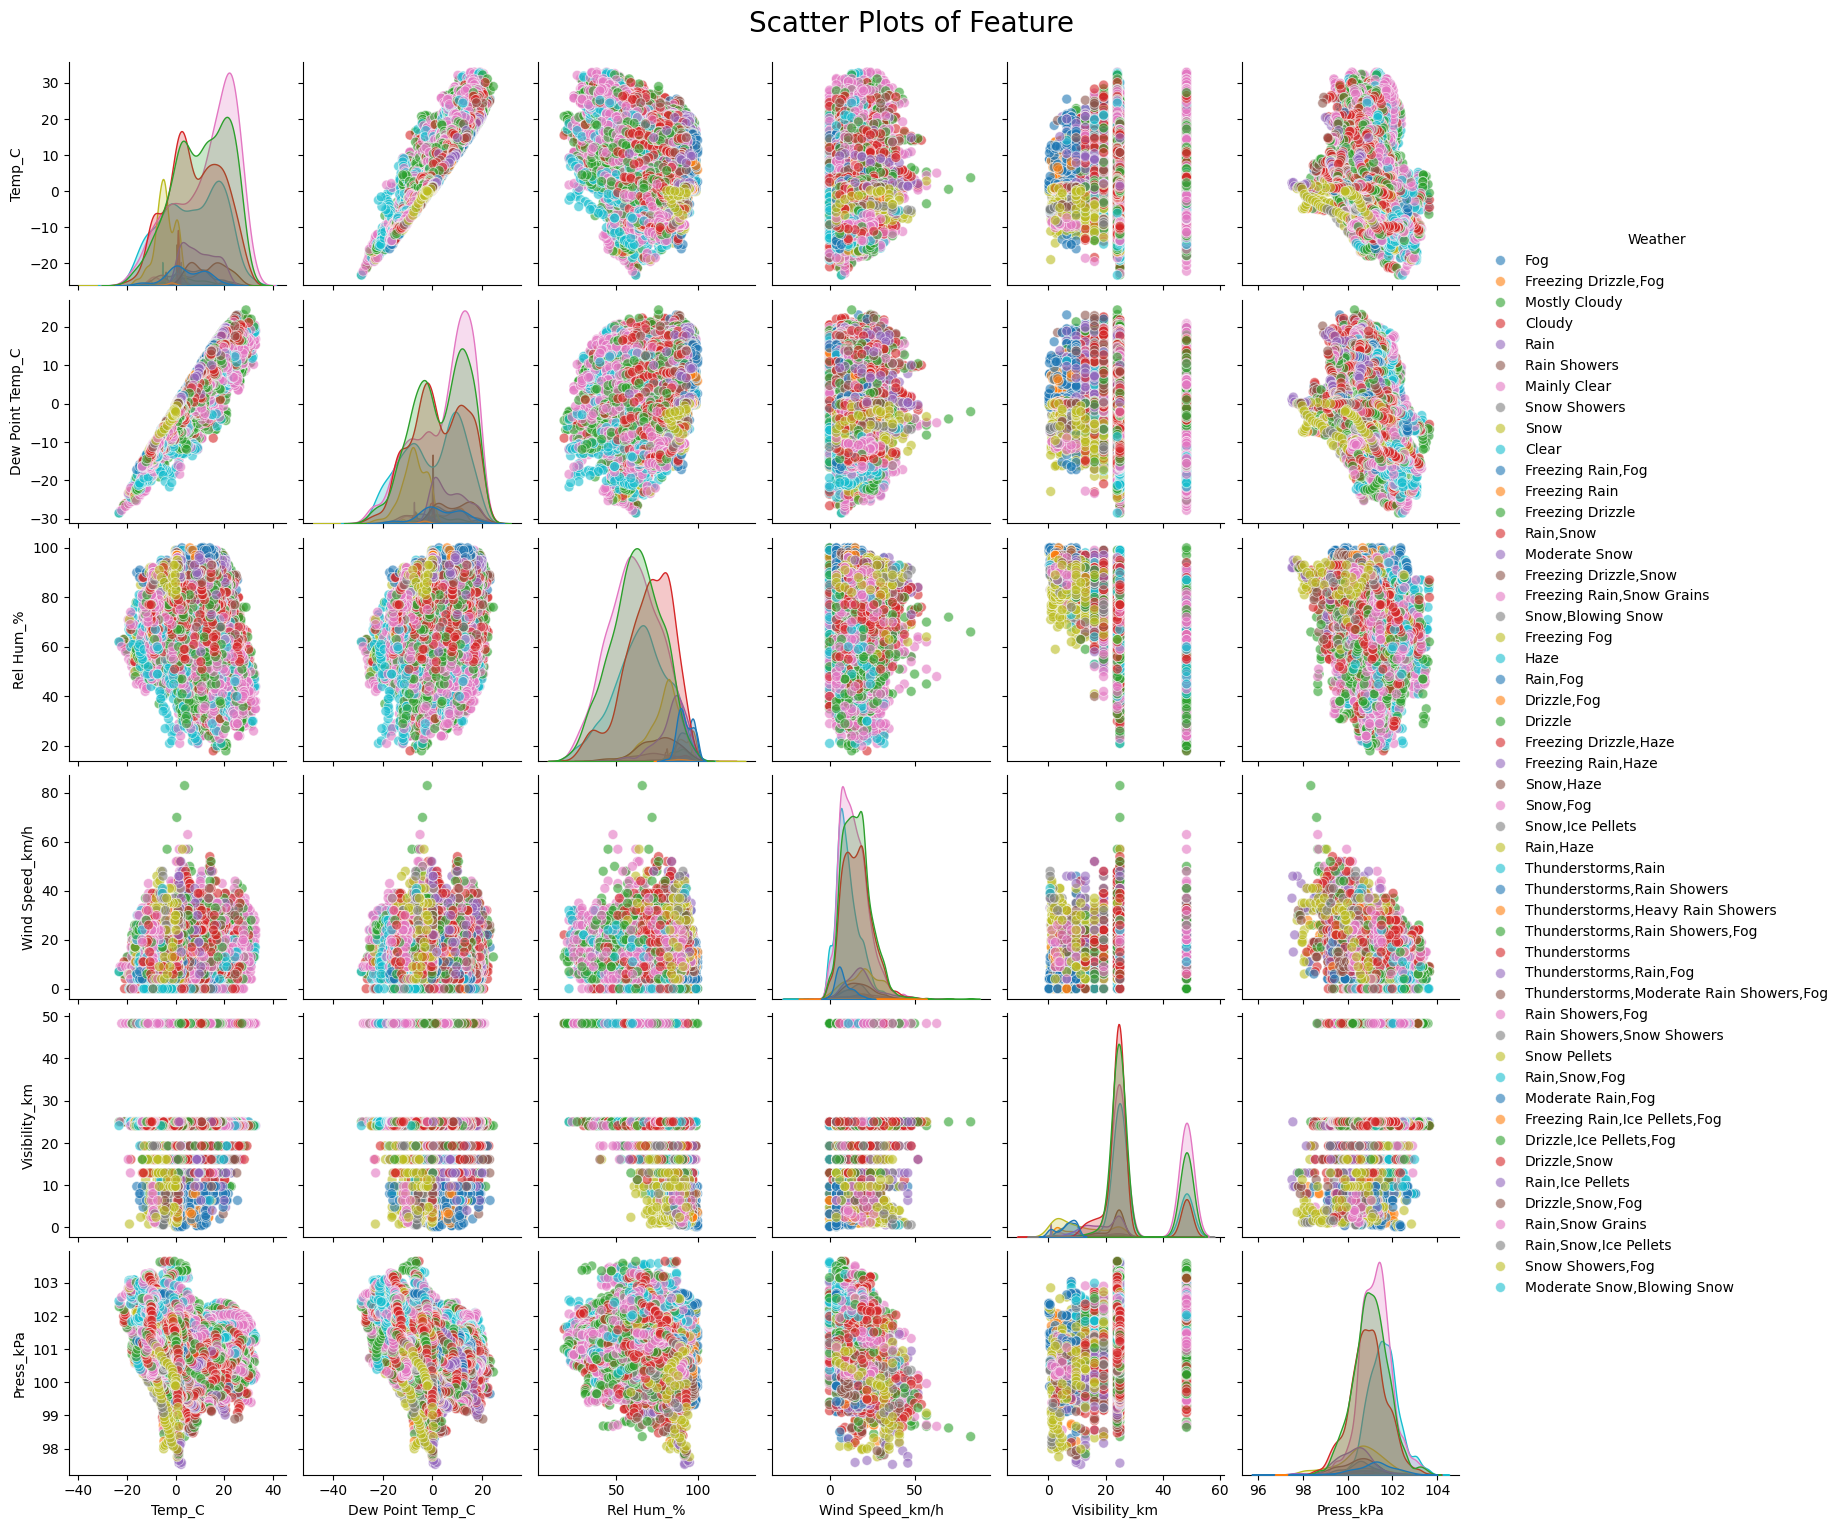

In [17]:
plt.figure(figsize=(15, 15))
sns.pairplot(data_exploded, hue='Weather', vars=features, palette='tab10', plot_kws={'alpha': 0.6, 's': 50})
plt.suptitle('Scatter Plots of Feature', y=1.02, fontsize=20)
plt.show()

We were able to analyze the data dispersion with a scatterplot, but this poses another problem. Having 50 unique outputs not only hinders our analysis but will also surely affect the performance of the model. The outputs are not entirely different; they mostly consist of a main weather type with some additional features in the explanation.

## Weather Simplification

Simplifying Weather to Improve Model Training Performance

In [18]:
# Define the mapping dictionary
weather_mapping = {
    'Snow': 'Snow',
    'Blowing Snow': 'Snow',
    'Snow Showers': 'Snow',
    'Snow,Fog': 'Snow',
    'Snow,Blowing Snow': 'Snow',
    'Moderate Snow': 'Snow',
    'Snow,Haze': 'Snow',
    'Freezing Drizzle,Snow': 'Snow',
    'Freezing Rain,Snow': 'Snow',
    'Rain,Snow': 'Snow',
    'Rain,Snow,Fog': 'Snow',
    'Rain,Snow,Ice Pellets': 'Snow',
    'Snow Pellets': 'Snow',
    'Snow Showers,Fog': 'Snow',
    'Snow Grains': 'Snow',
    'Freezing Rain,Snow Grains': 'Snow',

    'Fog': 'Fog',
    'Freezing Fog': 'Fog',
    'Rain,Fog': 'Fog',
    'Drizzle,Fog': 'Fog',
    'Drizzle,Snow,Fog': 'Fog',
    'Freezing Drizzle,Fog': 'Fog',
    'Freezing Rain,Fog': 'Fog',
    'Rain Showers,Fog': 'Fog',
    'Thunderstorms,Rain Showers,Fog': 'Fog',
    'Moderate Rain,Fog': 'Fog',
    'Thunderstorms,Moderate Rain Showers,Fog': 'Fog',
    'Drizzle,Ice Pellets,Fog': 'Fog',
    'Thunderstorms,Rain,Fog': 'Fog',
    'Rain,Snow,Fog': 'Fog',

    'Rain': 'Rain',
    'Drizzle': 'Rain',
    'Freezing Drizzle': 'Rain',
    'Freezing Rain': 'Rain',
    'Rain Showers': 'Rain',
    'Thunderstorms,Rain Showers': 'Rain',
    'Thunderstorms,Rain': 'Rain',
    'Rain,Haze': 'Rain',
    'Thunderstorms,Heavy Rain Showers': 'Rain',
    'Rain,Ice Pellets': 'Rain',
    'Rain,Snow Grains': 'Rain',

    'Clear': 'Clear',
    'Mainly Clear': 'Clear',
    'Mostly Cloudy': 'Cloudy',
    'Cloudy': 'Cloudy',
    'Haze': 'Haze',
    'Moderate Snow,Blowing Snow': 'Snow',
    'Thunderstorms': 'Thunderstorms',
    'Rain Showers,Snow Showers': 'Rain and Snow'
}

# Function to categorize weather conditions
def categorize_weather(weather):
    for key, value in weather_mapping.items():
        if key in weather:
            return value
    return weather

# Replace the values in 'Weather' column with the categorized weather conditions
data['Weather'] = data['Weather'].apply(categorize_weather)

# Display the first few rows of the updated DataFrame
print(data.head())

            Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0 2012-01-01 00:00:00    -1.8              -3.9         86                4   
1 2012-01-01 01:00:00    -1.8              -3.7         87                4   
2 2012-01-01 02:00:00    -1.8              -3.4         89                7   
3 2012-01-01 03:00:00    -1.5              -3.2         88                6   
4 2012-01-01 04:00:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa Weather  
0            8.0     101.24     Fog  
1            8.0     101.24     Fog  
2            4.0     101.26     Fog  
3            4.0     101.27     Fog  
4            4.8     101.23     Fog  


In [19]:
#checking the weather data after the modification
print(data['Weather'].value_counts())
print('\nUnique Weather:', data['Weather'].unique())

Weather
Cloudy           3797
Clear            3432
Rain              585
Snow              583
Fog               369
Haze               16
Thunderstorms       2
Name: count, dtype: int64

Unique Weather: ['Fog' 'Cloudy' 'Rain' 'Clear' 'Snow' 'Haze' 'Thunderstorms']


We decided to categorize the 50 unique outputs, which had some similarities, into 7 main features. This simplification of the weather groups not only makes our analysis process easier but will also help us in the long term with training and testing our model.

# Hypothetical Analysis

## Hypothesis Testing 1

### Feature Comparison: The distribution of the Wind Speed’ feature differs significantly between the ‘Rain’ and ‘Snow’ categories.

#### Hypotheses:
- Alt Hypothesis (H₁): The mean Wind Speed for the ‘Rain’ category is different from the mean speed for the ‘Snow’ category.
- Null Hypothesis (H₀): The mean Wind Speed for the ‘Rain’ category is equal to the mean speed for the ‘Snow’ category.

In [20]:
rain_wind_speed = data[data['Weather'] == 'Rain']['Wind Speed_km/h']
snow_wind_speed = data[data['Weather'] == 'Snow']['Wind Speed_km/h']

# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(rain_wind_speed, snow_wind_speed)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Draw a conclusion from the result
if p_value < 0.05:
    print("\nWe reject the null hypothesis.")
    print("The mean Wind Speed for the 'Rain' category is different from the mean speed for the 'Snow' category.")
else:
    print("\nWe fail to reject the null hypothesis.")
    print("The mean Wind Speed for the 'Rain' category is equal to the mean speed for the 'Snow' category.")

T-statistic: -3.985619787073972
P-value: 7.148336300599761e-05

We reject the null hypothesis.
The mean Wind Speed for the 'Rain' category is different from the mean speed for the 'Snow' category.


## Hypothesis Testing 2

### Feature Comparison: The mean value of the feature labeled as ‘Humidity’ differs between the ‘Cloudy’ and ‘Clear’ categories.

#### Hypotheses:
- Alt Hypothesis (H₁): The mean value of the Humidity feature for the ‘Cloudy’ category is higher than that for the ‘Clear’ category.
- Null Hypothesis (H₀): The mean value of the Humidity feature is the same for both ‘Cloudy’ and ‘Clear’ categories.

In [21]:
cloudy_humidity = data[data['Weather'] == 'Cloudy']['Rel Hum_%']
clear_humidity = data[data['Weather'] == 'Clear']['Rel Hum_%']

# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(cloudy_humidity, clear_humidity)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Draw a conclusion from the result
if p_value < 0.05:
    print("\nWe reject the null hypothesis.")
    print("The mean value of the Humidity feature for the 'Cloudy' category is higher than that for the 'Clear' category.")
else:
    print("\nWe fail to reject the null hypothesis.")
    print("The mean value of the Humidity feature is the same for both 'Cloudy' and 'Clear' categories.")

T-statistic: 9.022125995368771
P-value: 2.328912092212718e-19

We reject the null hypothesis.
The mean value of the Humidity feature for the 'Cloudy' category is higher than that for the 'Clear' category.


# Model Training

### Data Splitting

In [22]:
# Choosing features and target output for model training
features = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']
target = 'Weather'

X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of X and y to ensure they are correct
print((X_train.shape, X_test.shape), (y_train.shape, y_test.shape))

((7027, 6), (1757, 6)) ((7027,), (1757,))


## RandomForestClassifier

### Random Forest Testing

Just putting a one random forest classifier as an example of a test case [0.73 accuracy]

In [23]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy: .3f}')

print(classification_report(y_test, y_pred))

Accuracy:  0.733
              precision    recall  f1-score   support

       Clear       0.72      0.77      0.74       665
      Cloudy       0.71      0.74      0.73       772
         Fog       0.90      0.94      0.92        78
        Haze       0.50      1.00      0.67         1
        Rain       0.68      0.36      0.47       112
        Snow       0.86      0.72      0.78       129

    accuracy                           0.73      1757
   macro avg       0.73      0.75      0.72      1757
weighted avg       0.73      0.73      0.73      1757



### Random Forest Hyperparameter Tuning

In [24]:
# Define a parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Define the grid search with increased verbosity
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=2, n_jobs=-1, verbose=3)

# Fit the grid search to the data
rf_grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print('Best parameters:', rf_grid_search.best_params_)
print('Best score:', rf_grid_search.best_score_)

# Get the best model
best_rf_model = rf_grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

Fitting 2 folds for each of 384 candidates, totalling 768 fits
Best parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.6941788374945583
              precision    recall  f1-score   support

       Clear       0.72      0.76      0.74       665
      Cloudy       0.71      0.72      0.71       772
         Fog       0.85      0.94      0.89        78
        Haze       0.50      1.00      0.67         1
        Rain       0.64      0.41      0.50       112
        Snow       0.88      0.71      0.78       129

    accuracy                           0.73      1757
   macro avg       0.72      0.76      0.72      1757
weighted avg       0.73      0.73      0.72      1757



## SVM Model

### SVM Model Testing

In [25]:
# Initialize the SVM classifier
svm_classifier = SVC()

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')

# Print the classification report
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.599
              precision    recall  f1-score   support

       Clear       0.58      0.70      0.63       665
      Cloudy       0.59      0.56      0.57       772
         Fog       0.80      0.81      0.80        78
        Haze       0.00      0.00      0.00         1
        Rain       0.70      0.12      0.21       112
        Snow       0.65      0.61      0.63       129

    accuracy                           0.60      1757
   macro avg       0.55      0.47      0.48      1757
weighted avg       0.61      0.60      0.59      1757



### SVM Hyperparameter Tuning

In [26]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Define the grid search with increased verbosity and more folds
svm_grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=2, n_jobs=-1, verbose=3)

# Fit the grid search to the data
svm_grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", svm_grid_search.best_params_)
print("Best score: ", svm_grid_search.best_score_)

# Get the best model
best_svm_model = svm_grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_svm_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

Fitting 2 folds for each of 32 candidates, totalling 64 fits
Best parameters found:  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best score:  0.635690534596193
              precision    recall  f1-score   support

       Clear       0.64      0.70      0.67       665
      Cloudy       0.64      0.67      0.66       772
         Fog       0.81      0.87      0.84        78
        Haze       0.33      1.00      0.50         1
        Rain       0.57      0.25      0.35       112
        Snow       0.84      0.63      0.72       129

    accuracy                           0.66      1757
   macro avg       0.64      0.69      0.62      1757
weighted avg       0.66      0.66      0.65      1757



## Testing Removal of Feature

 Make a testing whether removing one or more feature would help in term of the accuracy of the model

In [27]:
# Extract components from 'Date/Time'
data['Year'] = data['Date/Time'].dt.year
data['Month'] = data['Date/Time'].dt.month
data['Day'] = data['Date/Time'].dt.day
data['Hour'] = data['Date/Time'].dt.hour
data = data.drop(columns=['Date/Time'])

In [28]:
# Define features and target
features = ['Year', 'Month', 'Day', 'Hour', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']
target = 'Weather'

# Split the data into train and test sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize dictionary to store results
results = []

# Loop through each feature
for feature in features:
    # Remove the feature from the dataset
    X_train_reduced = X_train.drop(columns=[feature])
    X_test_reduced = X_test.drop(columns=[feature])

    # Initialize and train the Random Forest classifier
    rf_classifier = RandomForestClassifier(random_state=42)
    rf_classifier.fit(X_train_reduced, y_train)

    # Make predictions on the test set
    y_pred = rf_classifier.predict(X_test_reduced)

    # Calculate accuracy and get the classification report
    accuracy = accuracy_score(y_test, y_pred)

    # Store the result
    results.append({'Feature Removed': feature, 'Accuracy': accuracy})

results = pd.DataFrame(results)
# Print all results
print("Summary of accuracies with each feature removed:")
results

Summary of accuracies with each feature removed:


,Feature Removed,Accuracy
0,Year,0.789983
1,Month,0.786568
2,Day,0.773478
3,Hour,0.790552
4,Temp_C,0.792260
5,Dew Point Temp_C,0.794536
6,Rel Hum_%,0.794536
7,Wind Speed_km/h,0.799659
8,Visibility_km,0.769493
9,Press_kPa,0.782584


Below is the initial accuracy during the first run for feature removal testing which totally different from above accuracy summary, which result in model training using all possible feature and not removing any of the feature on the model training dataset.

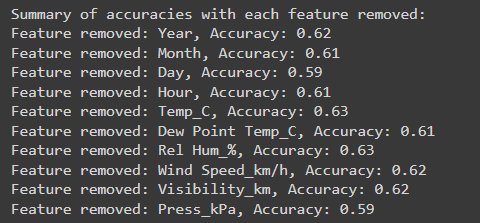

## Model Exporting

To deploy our prediction model, we pickle the model into pickle file so that we just load it to use. There's no need to run from the data manipulation and model training that cost a lot of running time to complete.

We are using pickle because pickle file can be load with any type of object and easy to use.

In [29]:
with open('rf_model.pkl', 'wb') as f:
  pickle.dump(best_rf_model, f)

with open('svm_model.pkl', 'wb') as f:
  pickle.dump(best_svm_model, f)

## Model Testing

In [30]:
with open('rf_model.pkl', 'rb') as f:
    random_forest_model = pickle.load(f)

with open('svm_model.pkl', 'rb') as f:
    svm_model = pickle.load(f)

In [31]:
# This supposed to return fog as the output
test_data = {
    'Temp_C': [25.0],
    'Dew Point Temp_C': [15.0],
    'Rel Hum_%': [60],
    'Wind Speed_km/h': [10],
    'Visibility_km': [10.0],
    'Press_kPa': [101.5]
}

test_df = pd.DataFrame(test_data)

In [32]:
# Convert the test data to a DataFrame
test_df = pd.DataFrame(test_data)

# Ensure the feature order matches the training data
features = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']
test_df = test_df[features]

# Make predictions using the trained best_model
prediction_rf = random_forest_model.predict(test_df)
prediction_svm = svm_model.predict(test_df)

# Print the predictions
print("Random Forest Predicted Weather:", prediction_rf)
print("SVM Predicted Weather:", prediction_svm)

Random Forest Predicted Weather: ['Rain']
SVM Predicted Weather: ['Clear']


# UI Deployment

For the prediction we use the model that we saved as pickle file before. So, the idea is to just load the pickle model file and use it to predict the weather according to the features inserted by user.

In [33]:
port_no = 5000

app = Flask(__name__)
ngrok.set_auth_token("2giD02i09q1RyfdACSw8dfcZAcw_7o1NXL5bXWiVZBWLWzuXH")
port_no = 5000
public_url = ngrok.connect(port_no).public_url

with open('rf_model.pkl', 'rb') as f:
    model = pickle.load(f)

template_name = 'index.html'

@app.route("/")
def home():
    return render_template(template_name)

@app.route('/getprediction', methods=['POST'])
def getPrediction():
    # Get data from POST request
    temp_c = float(request.form.get('temp_c'))
    dew_point_temp_c = float(request.form.get('dew_point_temp_c'))
    rel_hum = float(request.form.get('rel_hum'))
    wind_speed = float(request.form.get('wind_speed'))
    visibility = float(request.form.get('visibility'))
    press_kpa = float(request.form.get('press_kpa'))

    # Prepare the feature vector for prediction
    input_features = {
        'Temp_C': [temp_c],
        'Dew Point Temp_C': [dew_point_temp_c],
        'Rel Hum_%': [rel_hum],
        'Wind Speed_km/h': [wind_speed],
        'Visibility_km': [visibility],
        'Press_kPa': [press_kpa]
    }
    final_input = pd.DataFrame(input_features)

    # Make prediction using model
    predicted_weather = model.predict(final_input)
    print(predicted_weather)

    # Map prediction to corresponding image filename using if-else logic
    if len(predicted_weather) > 0:
      if predicted_weather[0] in ['Clear']:
          predicted_image = 'clear.png'
      elif predicted_weather[0] in ['Cloudy']:
          predicted_image = 'cloudy.png'
      elif predicted_weather[0] in ['Fog']:
          predicted_image = 'fog.png'
      elif predicted_weather[0] in ['Haze']:
          predicted_image = 'haze.png'
      elif predicted_weather[0] in ['Rain']:
          predicted_image = 'rain.png'
      elif predicted_weather[0] in ['Snow']:
          predicted_image = 'snow.png'
      elif predicted_weather[0] in ['Thunderstorms']:
          predicted_image = 'thunderstorms.png'
      else:
          predicted_image = 'default.png'
    else:
      predicted_image = 'default.png'


    # Return prediction with image
    return render_template(template_name, output=f'Predicted Weather: {predicted_weather[0]}', image_file=predicted_image)

print(f"To access the Google Link please click {public_url}")
app.run(port=port_no)

To access the Google Link please click https://c72f-2001-f40-90e-2ba-e114-ef6e-7575-f82b.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [13/Jun/2024 00:04:30] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [13/Jun/2024 00:04:32] "GET /static/ HTTP/1.1" 404 -
127.0.0.1 - - [13/Jun/2024 00:04:32] "GET /static/wind_icon.png HTTP/1.1" 200 -
127.0.0.1 - - [13/Jun/2024 00:04:32] "GET /static/dewpoint_icon.png HTTP/1.1" 200 -
127.0.0.1 - - [13/Jun/2024 00:04:32] "GET /static/temp_icon.png HTTP/1.1" 200 -
127.0.0.1 - - [13/Jun/2024 00:04:32] "GET /static/index.css HTTP/1.1" 200 -
127.0.0.1 - - [13/Jun/2024 00:04:32] "GET /static/visibility_icon.png HTTP/1.1" 200 -
127.0.0.1 - - [13/Jun/2024 00:04:32] "GET /static/hum_icon.png HTTP/1.1" 200 -
127.0.0.1 - - [13/Jun/2024 00:04:32] "GET /static/pressure_icon.png HTTP/1.1" 200 -
127.0.0.1 - - [13/Jun/2024 00:04:33] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [13/Jun/2024 00:04:49] "POST /getprediction HTTP/1.1" 200 -


['Cloudy']


127.0.0.1 - - [13/Jun/2024 00:04:50] "GET /static/index.css HTTP/1.1" 304 -
127.0.0.1 - - [13/Jun/2024 00:04:50] "GET /static/wind_icon.png HTTP/1.1" 304 -
127.0.0.1 - - [13/Jun/2024 00:04:50] "GET /static/dewpoint_icon.png HTTP/1.1" 304 -
127.0.0.1 - - [13/Jun/2024 00:04:50] "GET /static/visibility_icon.png HTTP/1.1" 304 -
127.0.0.1 - - [13/Jun/2024 00:04:50] "GET /static/hum_icon.png HTTP/1.1" 304 -
127.0.0.1 - - [13/Jun/2024 00:04:51] "GET /static/temp_icon.png HTTP/1.1" 304 -
127.0.0.1 - - [13/Jun/2024 00:04:51] "GET /static/pressure_icon.png HTTP/1.1" 304 -
127.0.0.1 - - [13/Jun/2024 00:04:51] "GET /static/cloudy.png HTTP/1.1" 200 -
